In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

In [2]:
all_data = pd.read_csv("../data/X_train_update.csv", index_col='Unnamed: 0')
target = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col='Unnamed: 0')

In [3]:
all_data.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [6]:
#Reduction de 70 % da taille du jeu de données initial (car trop d'images à traiter)
_, data, _, label = train_test_split(all_data, target, test_size=0.3, random_state = 42, stratify = target) 

In [7]:
#Split Train / Test / Valid (60 / 20 / 20)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state = 0, stratify = label) 
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_train_raw, y_train, test_size=0.2, random_state = 0, stratify = y_train) 

In [8]:
print("Taille totale du jeu reduit : {} entrées".format(len(data)))
print("Train : {} \nValidation : {} \nTest : {}".format(len(X_train_raw),len(X_valid_raw),len( X_test_raw)))

Taille totale du jeu reduit : 25475 entrées
Train : 16304 
Validation : 4076 
Test : 5095


In [9]:
images_dir = "../data/images/image_train/"

# liste des chemins vers les images
X_train_path = [images_dir + "image_" + str(X_train_raw.iloc[k,3]) + "_product_"+str(X_train_raw.iloc[k,2])+".jpg" for k in range(len(X_train_raw))]
X_valid_path = [images_dir + "image_" + str(X_valid_raw.iloc[k,3]) + "_product_"+str(X_valid_raw.iloc[k,2])+".jpg" for k in range(len(X_valid_raw))]
X_test_path = [images_dir + "image_" + str(X_test_raw.iloc[k,3]) + "_product_"+str(X_test_raw.iloc[k,2])+".jpg" for k in range(len(X_test_raw))]

,designation,description,productid,imageid
11561,Accessoire Salle De Bain@ 1pcs Porte-Brosse À ...,1Pcs Toothbrush Holder Washroom Wall Paste Hoo...,4058776520,1282905942
29835,2 In1usb Charge De La Batterie À Distance Port...,Chargement de la batterie USB Télécommande cha...,4187115522,1311396665
31844,Mini Classeur Holly Hobbie American Greetings ...,NaN,3533717183,1220137948
76322,Jours De France N° 686 Du 06/01/1968 - Catheri...,NaN,3451774396,1213676724
10738,Portable Lunch Bag Tote Picnic Insulated Coole...,Portable Lunch Bag Tote Picnic Insulated Coole...,4057531355,1282902953


In [14]:
# fonction pour le chargement des images sans augmentation
def load_image(filepath) :
    # Chargement de l'image du df en mémoire
    im = tf.io.read_file(filepath)
    
    # Décodage de l'info dans un tenseur RGB
    im = tf.image.decode_jpeg(im, 3)
        
    return im

In [16]:
y_train.head()

,prdtypecode
47684,2583
61672,1301
3331,1140
44251,1280
59310,2522


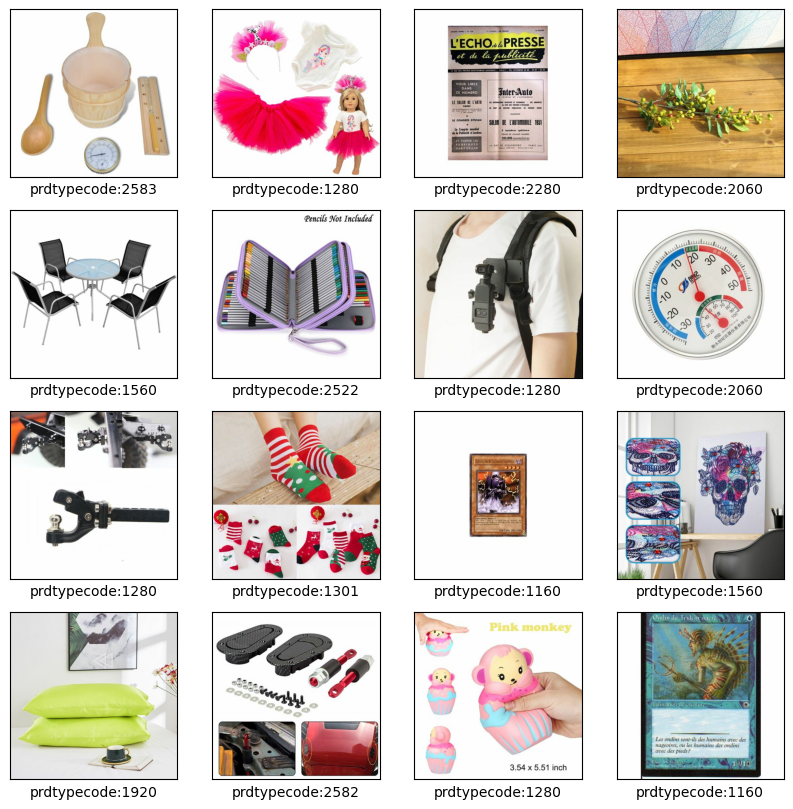

In [80]:
plt.figure(figsize=(10,10))

tirages = [np.random.randint(0,X_train_raw.shape[0]) for _ in range(16)]

for i, rand in enumerate(tirages):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(load_image(X_train_path[rand]), cmap=plt.cm.binary)
    plt.xlabel("prdtypecode:" + str(y_train['prdtypecode'].iloc[rand]))
plt.show()

In [88]:
for i, rand in enumerate(tirages):
    print("prdtypecode:")
    print(y_train['prdtypecode'].iloc[rand])
    print("designation:")
    print(X_train_raw['designation'].iloc[rand])
    print("description:")
    print(X_train_raw['description'].iloc[rand])
    print('\n')

prdtypecode:
2583
designation:
Accessoire de sauna 5pcs Seau avec cuillère sablier thermomètre | Brun
description:
Les accessoires de sauna y compris un seau une insertion en plastique pour le seau une cuillère un sablier et un thermo-hygromètre sont un ensemble indispensable pour les salles de sauna. Le seau est étanche avec un insert compatible. Le sablier est une bonne minuterie pour vous éviter de rester trop longtemps dans le sauna tandis que le thermo-hygromètre vous permet de régler le climat de sauna le plus agréable en mesurant la température et l&#39;humidité. Toutes les pièces sont fabriquées en un matériau résistant à la température pour une utilisation sûre et à long terme. Vous pouvez également rechercher des appareils de chauffage de sauna dans notre magasin si vous avez besoin. La gamme SKU de chauffages pour saunas dans notre boutique est de 50235 à 50243. <ul><li> 5 pièces dans un ensemble </li><li><strong> Seau : </strong></li><li> Matériau : bois massif </li><li> Di